<a href="https://colab.research.google.com/github/amitjaffe/ML_final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTA Project**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont

In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/data/MTAData.csv"
df = pd.read_csv(url)

In [ ]:
df.head(10)

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,REGULAR,7089463.0,2401758.0
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,04:00:00,REGULAR,7089491.0,2401764.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,08:00:00,REGULAR,7089511.0,2401807.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,12:00:00,REGULAR,7089598.0,2401889.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,16:00:00,REGULAR,7089801.0,2401946.0
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,20:00:00,REGULAR,7090115.0,2401978.0
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2019,00:00:00,REGULAR,7090281.0,2402005.0
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2019,04:00:00,REGULAR,7090306.0,2402008.0
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2019,08:00:00,REGULAR,7090321.0,2402028.0
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2019,12:00:00,REGULAR,7090416.0,2402087.0


In [ ]:
df.drop(["C/A","DESC","Unnamed: 0","UNIT","DIVISION","LINENAME"], axis=1, inplace=True)

In [ ]:
df.columns = ['SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES','amit']

In [ ]:
df.head()

,SCP,STATION,DATE,TIME,ENTRIES,amit
0,02-00-00,59 ST,06/08/2019,00:00:00,7089463.0,2401758.0
1,02-00-00,59 ST,06/08/2019,04:00:00,7089491.0,2401764.0
2,02-00-00,59 ST,06/08/2019,08:00:00,7089511.0,2401807.0
3,02-00-00,59 ST,06/08/2019,12:00:00,7089598.0,2401889.0
4,02-00-00,59 ST,06/08/2019,16:00:00,7089801.0,2401946.0


## **59 STATION**

In [ ]:
data = df[df["STATION"] == "59 ST"]

In [ ]:

def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),
                      shift_func(13),shift_func(14),shift_func(15),shift_func(16),shift_func(17),shift_func(18),shift_func(19)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]

In [ ]:
data_59 = new_data.groupby("DATE").sum()
data_59["weekend/weekday"] = [1,1,0,0,0,0,0]
data_59.index = [0,1,2,3,4,5,6]
data_59["station"] = ["59","59","59","59","59","59","59"]

## **TIMES SQ-42 ST**

In [ ]:
data = df[df["STATION"] == "TIMES SQ-42 ST"]

In [ ]:
unique_values = data["SCP"].unique()
unique_values

array(['01-00-00', '01-00-01', '01-00-02', '01-00-03', '01-00-04',
       '01-00-05', '01-00-06', '01-00-07'], dtype=object)

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_42SQ = new_data.groupby("DATE").sum()
data_42SQ["weekend/weekday"] = [1,1,0,0,0,0,0]
data_42SQ.index = [0,1,2,3,4,5,6]
data_42SQ["station"] = ["42","42","42","42","42","42","42"]

## **34 ST-HERALD SQ**

In [ ]:
data = df[df["STATION"] == "34 ST-HERALD SQ"]

In [ ]:
unique_values = data["SCP"].nunique()


In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),shift_func(13),shift_func(14),shift_func(15),
                      shift_func(16),shift_func(17),shift_func(18),shift_func(19),shift_func(20),shift_func(21),shift_func(22),shift_func(23),
                      shift_func(24),shift_func(25),shift_func(26),shift_func(27),shift_func(28),shift_func(29),shift_func(30),shift_func(31)
                      ,shift_func(32),shift_func(33),shift_func(34),shift_func(35),shift_func(36),shift_func(37),shift_func(38),shift_func(39),shift_func(40)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_34HQ = new_data.groupby("DATE").sum()
data_34HQ["weekend/weekday"] = [1,1,0,0,0,0,0]
data_34HQ.index = [0,1,2,3,4,5,6]
data_34HQ["station"] = ["34","34","34","34","34","34","34"]

In [ ]:
data_34HQ

,entries,exits,weekend/weekday,station
0,70531.0,70560.0,1,34
1,57393.0,52713.0,1,34
2,112752.0,104839.0,0,34
3,124260.0,115629.0,0,34
4,3973331.0,2769386.0,0,34
5,122989.0,112633.0,0,34
6,13393277.0,25310922.0,0,34


## **14 ST**

In [ ]:
data = df[df["STATION"] == "14 ST"]

In [ ]:
 data["SCP"].nunique()

32

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),shift_func(13),shift_func(14),shift_func(15),
                      shift_func(16),shift_func(17),shift_func(18),shift_func(19),shift_func(20),shift_func(21),shift_func(22),shift_func(23),
                      shift_func(24),shift_func(25),shift_func(26),shift_func(27),shift_func(28),shift_func(29),shift_func(30),shift_func(31)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_14 = new_data.groupby("DATE").sum()
data_14["weekend/weekday"] = [1,1,0,0,0,0,0]
data_14.index = [0,1,2,3,4,5,6]
data_14["station"] = ["14","14","14","14","14","14","14"]

## **5 AV/59 ST**

In [ ]:
data = df[df["STATION"] == "5 AV/59 ST"]

In [ ]:
 data["SCP"].nunique()

14

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),shift_func(13)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_59_5 = new_data.groupby("DATE").sum()
data_59_5["weekend/weekday"] = [1,1,0,0,0,0,0]
data_59_5.index = [0,1,2,3,4,5,6]
data_59_5["station"] = ["59","59","59","59","59","59","59"]

## **14 ST-UNION SQ**

In [ ]:
data = df[df["STATION"] == "14 ST-UNION SQ"]
data["SCP"].nunique()

26

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),shift_func(13),shift_func(14),shift_func(15),
                      shift_func(16),shift_func(17),shift_func(18),shift_func(19),shift_func(20),shift_func(21),shift_func(22),shift_func(23),
                      shift_func(24),shift_func(25)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_14US = new_data.groupby("DATE").sum()
data_14US["weekend/weekday"] = [1,1,0,0,0,0,0]
data_14US.index = [0,1,2,3,4,5,6]
data_14US["station"] = ["14","14","14","14","14","14","14"]

In [ ]:
data_14US

,entries,exits,weekend/weekday,station
0,44085.0,41696.0,1,14
1,30451.0,28793.0,1,14
2,61283.0,57298.0,0,14
3,70920.0,61807.0,0,14
4,73530.0,60141.0,0,14
5,68640.0,62462.0,0,14
6,60673.0,60320.0,0,14


## **42 ST-BRYANT PK**

In [ ]:
data = df[df["STATION"] == "42 ST-BRYANT PK"]
data["SCP"].nunique()

21

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8),shift_func(9),shift_func(10),shift_func(11),shift_func(12),shift_func(13),shift_func(14),shift_func(15),
                      shift_func(16),shift_func(17),shift_func(18),shift_func(19),shift_func(20)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_42BP = new_data.groupby("DATE").sum()
data_42BP["weekend/weekday"] = [1,1,0,0,0,0,0]
data_42BP.index = [0,1,2,3,4,5,6]
data_42BP["station"] = ["42","42","42","42","42","42","42"]

### **28 ST**

In [ ]:
data = df[df["STATION"] == "28 ST"]
data["SCP"].nunique()

9

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7),
                      shift_func(8)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_28 = new_data.groupby("DATE").sum()
data_28["weekend/weekday"] = [1,1,0,0,0,0,0]
data_28.index = [0,1,2,3,4,5,6]
data_28["station"] = ["28","28","28","28","28","28","28"]

## **72 ST**

In [ ]:
data = df[df["STATION"] == "72 ST"]
data["SCP"].nunique()

7

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_72 = new_data.groupby("DATE").sum()
data_72["weekend/weekday"] = [1,1,0,0,0,0,0]
data_72.index = [0,1,2,3,4,5,6]
data_72["station"] = ["72","72","72","72","72","72","72"]

## **SPRING ST**

In [ ]:
data = df[df["STATION"] == "SPRING ST"]
data["SCP"].nunique()

8

In [ ]:
def data_creats(i):
  unique_values = data["SCP"].unique()
  return data[data["SCP"] == unique_values[i]]

def shift_func(i):
  data = data_creats(i)
  data["entries"] = data["ENTRIES"].shift(-1) - data["ENTRIES"]
  data["exits"] = data["amit"].shift(-1) - data["amit"]
  data.drop(data.index[len(data.index)-1],axis= 0, inplace= True)
  return(data)


new_data = pd.concat([shift_func(0),shift_func(1),shift_func(2),shift_func(3),shift_func(4),shift_func(5),shift_func(6),shift_func(7)], axis = 0)
new_data.drop(["amit","ENTRIES"], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
new_data = new_data[(new_data["entries"] > 0) & (new_data["exits"] > 0) ]
data_spring = new_data.groupby("DATE").sum()
data_spring["weekend/weekday"] = [1,1,0,0,0,0,0]
data_spring.index = [0,1,2,3,4,5,6]
data_spring["station"] = ["spring","spring","spring","spring","spring","spring","spring"]

## **CREATING THE DATA**

In [ ]:
DATA = pd.concat([data_14US,data_59_5,data_42BP,data_14,data_34HQ,data_42SQ,data_59,data_28,data_72,data_spring], axis = 0)
DATA.index = list(range(0,70))
data = DATA

## Now, let's ask some questions :)

## Which is the most popular station accrording to our data?

In [ ]:
data.groupby("station").mean().round()[["entries","exits"]]

,entries,exits
station,,
14,45758.0,42866.0
28,10706.0,12599.0
34,2550648.0,4076669.0
42,25080.0,27521.0
59,16697.0,10812.0
72,8758.0,7486.0
spring,12789.0,2715.0


Are people travelling more during the weekend? or during the weekday?

In [ ]:
data.groupby("weekend/weekday").mean()

,entries,exits
weekend/weekday,,
0,378688.74,589477.2
1,18567.65,17960.1


## **prepearing the Data for the algorithm**

In [ ]:
Station = pd.get_dummies(DATA["station"], drop_first= True)
DATA = pd.concat([DATA,Station], axis = 1)
DATA.drop("station", axis = 1 , inplace= True)

In [ ]:
DATA

,entries,exits,weekend/weekday,28,34,42,59,72,spring
0,44085.0,41696.0,1,0,0,0,0,0,0
1,30451.0,28793.0,1,0,0,0,0,0,0
2,61283.0,57298.0,0,0,0,0,0,0,0
3,70920.0,61807.0,0,0,0,0,0,0,0
4,73530.0,60141.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
65,14953.0,2566.0,0,0,0,0,0,0,1
66,15990.0,3007.0,0,0,0,0,0,0,1
67,16342.0,2992.0,0,0,0,0,0,0,1
68,15823.0,3009.0,0,0,0,0,0,0,1


## **RUNNING THE MODEL**

In [ ]:
X = DATA[["entries","exits","34","42","59","28","72","spring"]]
y = DATA[["weekend/weekday"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 390)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
prediction
y_test["prediction"] = prediction
y_test


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weekend/weekday,prediction
12,0,0
65,0,0
26,0,0
67,0,0
13,0,0
59,0,0
46,0,0
37,0,0
38,0,0
21,1,0


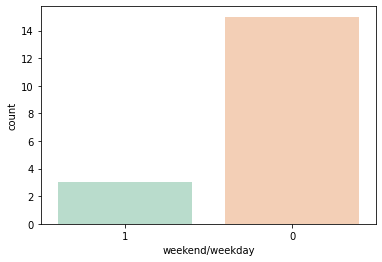

In [ ]:
sns.countplot(x = "weekend/weekday" ,data = y_test, palette = "Pastel2", order= [1,0]);

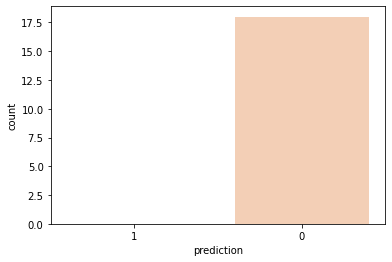

In [ ]:
sns.countplot(x = "prediction" ,data = y_test, palette = "Pastel2", order= [1,0]);

In [ ]:
def func1(x):
  if x[0]-x[1] != 0:
    return "MISTAKE"
  else:
    return "SUCCESS"

In [ ]:
y_test["mistakes vs success"] = y_test[["weekend/weekday","prediction"]].apply(func1, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_test

,weekend/weekday,prediction,mistakes vs success
12,0,0,SUCCESS
65,0,0,SUCCESS
26,0,0,SUCCESS
67,0,0,SUCCESS
13,0,0,SUCCESS
59,0,0,SUCCESS
46,0,0,SUCCESS
37,0,0,SUCCESS
38,0,0,SUCCESS
21,1,0,MISTAKE


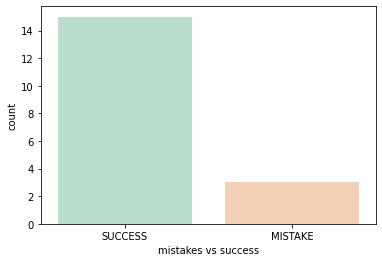

In [ ]:
sns.countplot(x = "mistakes vs success" ,data = y_test, palette = "Pastel2");

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
Y_test = y_test["weekend/weekday"]

In [ ]:
print(classification_report(Y_test,prediction));

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.00      0.00      0.00         3

    accuracy                           0.83        18
   macro avg       0.42      0.50      0.45        18
weighted avg       0.69      0.83      0.76        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


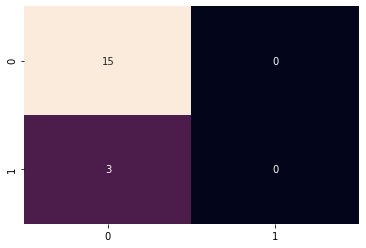

In [ ]:
cm = confusion_matrix(Y_test, prediction)
f = sns.heatmap(cm, annot=True, cbar= False)


In [ ]:
print(f"We can see that in 15 cases we predicted that it is a weekday (0) when it was actually a weekday (0)")

We can see that in 15 cases we predicted that it is a weekday (0) when it was actually a weekday (0)


In [ ]:
print(f"We can see that in 3 cases we predicted that it is a weekday (0) when it was actually a weekend (1) - ERROR")

We can see that in 3 cases we predicted that it is a weekday (0) when it was actually a weekend (1) - ERROR
